# House Pricing Regression using Dense Neural Network (DNN)

## Importar Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load e descrição do Dataset
[The Boston house-price data](http://lib.stat.cmu.edu/datasets/boston)
Esse dataset, mantido pela Carnegie Mellon University, é um conjunto de dados clássico e frequentemente usado em aprendizado de máquina e regressão. Ele contém informações sobre 506 casas vendidas em subúrbios de Boston entre 1970 e 1978. O objetivo do conjunto de dados é prever o preço de uma casa com base em 13 variáveis (*features*), como:

- CRIM: taxa de criminalidade per capita (por town).
- ZN: proporção de área residencial zoneada para grandes lotes
- INDUS: proporção de área zoneada para uso industrial (por town)
- CHAS: Charles River (binário: 1 se beira o rio, 0 se não)
- NOX: concentração de óxidos de nitrogênio (partes por milhão)
- RM: número médio de quartos por moradia
- AGE: proporção de unidades ocupadas pelos proprietários construídas antes de 1940
- DIS: distância ponderada para cinco centros de emprego de Boston (milhas)
- RAD: índice de acessibilidade de radial highways
- TAX: taxa de imposto de propriedade por $10.000
- PTRATIO: razão aluno-professor nas escolas (por town).
- B: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros (por town).
- LSTAT: porcentagem da população que não concluiu o ensino médio


<br>
O target, ou valor a ser previsto, é dado pela coluna MEDV:

- MEDV (TARGET): Valor mediano das casas ocupadas pelos proprietários em US$ 1.000s

<br>

**Objetivo**
Construir um **modelo de regressão** que usa as informações disponíveis (*features*) dessa base de dados como input e retorna um único valor de predição do valor da casa (em US$ 1000) como output.

O dataset pode ser obtido diretamente de: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)


In [17]:
# O keras possui alguns datasets prontos para serem usados
# Entre eles, o boston_housing (descrito acima)
data = tf.keras.datasets.boston_housing

# dividindo o conjunto de dados entre os dados de treinamento e teste
(x_treino, y_treino), (x_teste, y_teste) = data.load_data()

In [4]:
# 404 samples, com 13 colunas (features)
print(y_treino.shape)
# 404 saidas (labels)
print(y_treino.shape)

(404, 13)
(404,)


In [5]:
# verificando dados separados para teste
print(x_teste.shape)
print(y_teste.shape)

(102, 13)
(102,)


In [8]:
# verificando features da linha 0
y_treino[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
# label da linha 0
y_treino[0]

15.2

### Explorando o Target (Y)

In [10]:
# 5 primeiros itens do target
y_treino[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

In [15]:
# Obtendo algumas métricas das labels de treino
print('Preço mínimo em $K:', y_treino.min())
print('Preço médio $K:', round(y_treino.mean(), 2))
print('Preço máximo em $K:', y_treino.max())

Preço mínimo em $K: 5.0
Preço médio $K: 22.4
Preço máximo em $K: 50.0


In [16]:
# Obtendo algumas métricas das labels de teste
print('Preço mínimo em $K:', y_teste.min())
print('Preço médio $K:', round(y_teste.mean(), 2))
print('Preço máximo em $K:', y_teste.max())

Preço mínimo em $K: 5.6
Preço médio $K: 23.08
Preço máximo em $K: 50.0


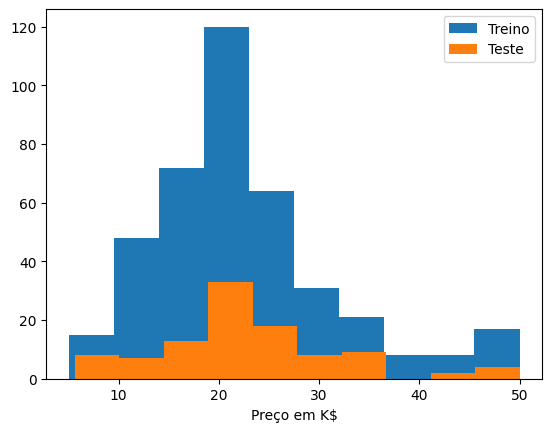

In [18]:
# Gerando histogramas com essas métricas
plt.hist(y_treino, label='Treino')
plt.hist(y_teste, label = 'Teste')
plt.xlabel('Preço em K$')
plt.legend();
# Notar que os dados de treinamento tem mais ou menos a mesma distribuição
# Isso é algo bom e necessário para um bom treinamento do algoritmo

### Explorando os Atributos de Entrada (X)

In [19]:
# Quantas features existem no dataset
len(x_treino[1])

13

In [20]:
# Verificar o min e o max de cada feature (atributos)
for i in range(len(x_treino[0])):
  print(f"Atributo {i}: varia de {x_treino[:,i].min()} a {x_treino[:,i].max()}")


Atributo 0: varia de 0.00632 a 88.9762
Atributo 1: varia de 0.0 a 100.0
Atributo 2: varia de 0.46 a 27.74
Atributo 3: varia de 0.0 a 1.0
Atributo 4: varia de 0.385 a 0.871
Atributo 5: varia de 3.561 a 8.725
Atributo 6: varia de 2.9 a 100.0
Atributo 7: varia de 1.1296 a 10.7103
Atributo 8: varia de 1.0 a 24.0
Atributo 9: varia de 188.0 a 711.0
Atributo 10: varia de 12.6 a 22.0
Atributo 11: varia de 0.32 a 396.9
Atributo 12: varia de 1.73 a 37.97


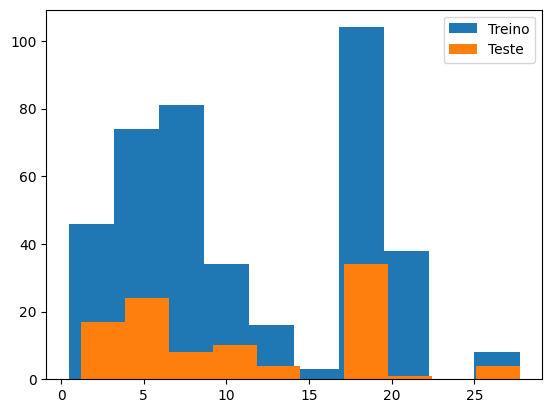

In [21]:
# mudar o numero da feature na linha abaixo plota um gráfico diferente
feature = 2
plt.hist(x_treino[:,feature], label='Treino')
plt.hist(x_teste[:,feature], label='Teste')
plt.legend();

### Pré-processamento dos dados

**Normalizing Data**:


In [25]:
# StandardScaler aplica uma escala a um conjunto de dados (normaliza)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit do scaler no conjunto de treinamento (somente)
scaler.fit(x_treino)

# then we call the transform method to scale both the training and testing data
x_treino_normalizado = scaler.transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

Another way do normalize data directly with numpy is:
- Get per-feature statistics (mean, standard deviation) from the training set to normalize by:
  - x_train_mean = np.mean(x_train, axis=0)
  - x_train_std = np.std(x_train, axis=0)
  - x_train_norm = (x_train - x_train_mean) / x_train_std

  - x_test_norm = (x_test - x_train_mean) / x_train_std

**Note** that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [27]:
# Verificando máximnos e mínimos dos dados normalizados
print (x_treino_normalizado.max())
print (x_treino_normalizado.min())

9.234847178400438
-3.8172503201932715


## Define Model

In [ ]:
x_treino.shape

(404, 13)

In [28]:
input_shape = x_treino.shape[1]
input_shape # sempre 13 features de entrada (características das casas)

13

The model should be created, for example with those layers:
- [input] ==> [hidden] ==> [output]:
  - 13 ==> [20] ==>  1

The **Input Layer** should be 13 (number of features) and the **Output Layer** shoub be 1 to match the target (y). The number of neurons at **Hidden layers** are arbitrary.

In [29]:
# The Input Layer should be 13 (number of features) and the Output Layer shoub
# be 1 to match the target (y). The number of neurons at Hidden layers are arbitrary.
# Quanto mais simples melhor. Muitos neurônios podem fazer o modelo muito bom para
# o treino, mas não ser capaz de realizar inferências de forma satisfatória (overfit)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(20, activation='relu'), # começando com 20
    tf.keras.layers.Dense(1)
    ])

# activation='relu' : cria a não linearidade (simula o comportamento do diodo)
# para qualquer modelo = USE O RELU

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Input layer has 13 conections, one for each feature [X]. Each feature goes to each one of the neurons of 1st Dense Layer, that has 20 Neurons. So, total parameters 1st Dense Layer will be ws=(13 x 20) + bs=20 ==> 280. The output layer will be only one Neuron that has one input from the output of previous layer (20 ) + 1 b ==> 21.

For simplicity, the input layer can be "merge with 1st layer"

In [30]:
# Esse código abaixo é só uma outra forma de gerar o mesmo modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,
                          activation='relu',
                          input_shape = [13]),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Compile Model

### Type of errors
In statistics, `Mean Absolute Error (MAE)` is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:


$$MAE=\frac{1}{n}\sum_{i=1}^{n}(\left|y_{i}-\hat{y}_{i}\right|)$$


Another alternative to evaluate regression is the `Root Mean Square Error (RMSE)`.
This is the root of the  mean of the squared errors. It is a most popular measure of regression model's performance because also keep the same unit as y and larger errors are noted more than with MAE.

$$RSME=\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat{y}_{i})}^2}$$

You can use MSE to calculate loss, but also tracking the MAE or RSME, once those values will have the "same order" of the Target (in the case, multiples of USD1,000).

The optimizer used is [ADAM](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The hyperparameter "Learning-Rate" used is the default ==> 0.001

In [31]:
# Escolher o erro do modelo
# É interessante que o erro seja apresentado na mesma unidade da métrica,
# como o RSME faz.
model.compile(
    optimizer='adam', # deixa um pouco mais pesado, mas é o mais utilizado
    loss='mse',
    metrics=['mae'] # used to monitor the training and testing steps.
    )

## Train the model

In [32]:
history = model.fit(
    x_treino_normalizado,
    y_treino,
    epochs=1000, # 1000 épocas
    verbose=0 # evitar comentários do treinamento
    )

Inspecting the model

In [33]:
train_eval = model.evaluate(x_treino_normalizado, y_treino)
print ("Training data MAE: {:.2}".format(train_eval[1]))
# MAE: 1.7 = $ 1.700,00

13/13 [==============================] - 0s 2ms/step - loss: 5.6522 - mae: 1.6629
Training data MAE: 1.7


In [34]:
history.history.keys()

dict_keys(['loss', 'mae'])

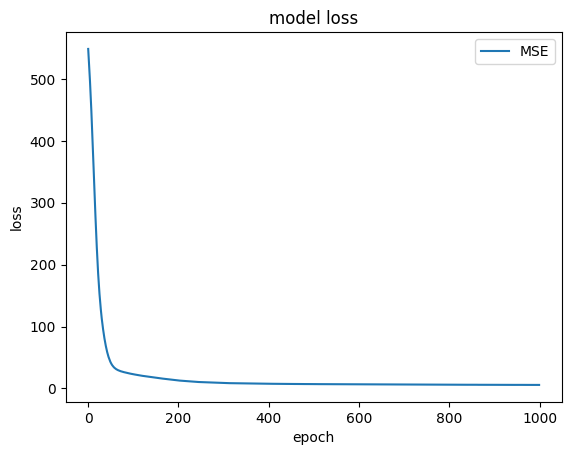

In [35]:
# MSE = $^2 (unidade)
plt.plot(history.history['loss'], label='MSE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

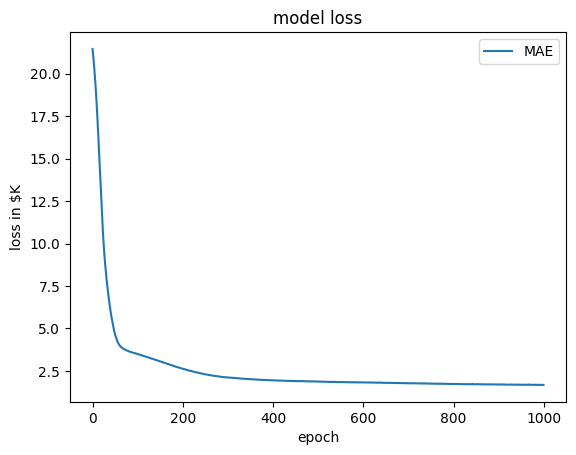

In [36]:
# MAE = $ (unidade)
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss in $K')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testing the trained model



In [37]:
# Testando com dados novos, que o modelo nunca viu
test_eval = model.evaluate(x_teste_normalizado, y_teste)
print ("Test data MAE: {:.2}".format(test_eval[1]))

4/4 [==============================] - 0s 9ms/step - loss: 16.6935 - mae: 2.6394
Test data MAE: 2.6


In [38]:
rsme = round(np.sqrt(test_eval[0]), 3)
rsme

4.086

The model has an RSME error of around USD4,000 and an MAE of around USD 2,600, what is very good for house's price estimation.  

Note: With features **not normalized**, we got loss (MSE): 22.0815; RSME: USD4,700 and  MAE: USD3,500

In [39]:
y_hat = model.predict(x_teste_normalizado) # y_hat é o nome dado para o valor previsto
print(y_hat[:5]) # get the output predict values for the 5 first samples

4/4 [==============================] - 0s 3ms/step
[[ 8.132537]
 [18.593914]
 [22.434732]
 [37.8076  ]
 [24.97108 ]]


In [40]:
y_teste[:5] # get the output real known values for the 5 first samples

array([ 7.2, 18.8, 19. , 27. , 22.2])

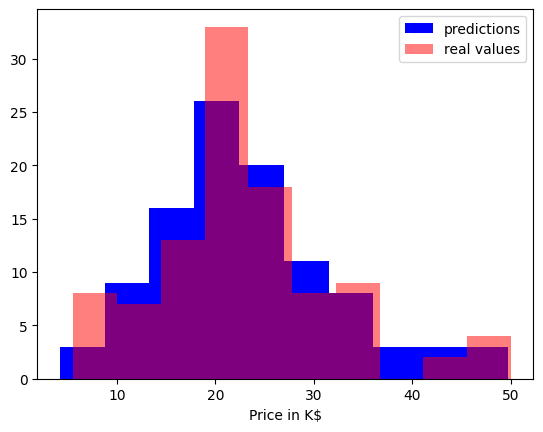

In [41]:
plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_teste, label = 'real values', color = 'r', alpha=0.5) # alpha é a transparência das colunas
plt.xlabel('Price in K$')
plt.legend();

## Doing Inference

In [42]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5]) # valores "chutados"
xt.shape

(13,)

In [43]:
x_treino.shape

(404, 13)

In [44]:
xt = np.reshape(xt, (1, 13)) # reshape porque é uma matriz 1x13
xt.shape

(1, 13)

In [45]:
xt

array([[  1.1,   0. ,   9. ,   0. ,   0.6,   7. ,  92. ,   3.8,   4. ,
        300. ,  21. , 200. ,  19.5]])

In [46]:
xt_norm = scaler.transform(xt) # mesmo scaler feito com os dados de treinamento
xt_norm

array([[-0.28659955, -0.48361547, -0.30934443, -0.25683275,  0.36401915,
         1.03386853,  0.82381223,  0.02945662, -0.62624905, -0.63729594,
         1.14850044, -1.64672402,  0.93287232]])

In [47]:
yt = model.predict(xt_norm)
yt

1/1 [==============================] - 0s 24ms/step


array([[16.403364]], dtype=float32)

In [48]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt = np.reshape(xt, (1, 13))
xt_norm = scaler.transform(xt)
yt = model.predict(xt_norm)
print("The predict value for this house is US${:.2f} thousand".format(yt[0][0]))

1/1 [==============================] - 0s 21ms/step
The predict value for this house is US$16.40 thousand


# Extra
## Finding the correct Hyperparameters
- [KerasTuner](https://keras.io/keras_tuner/)

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search.


In [49]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [50]:
import tensorflow as tf
import keras_tuner as kt

In [51]:
data = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = data.load_data()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

Write a function that creates and returns a Keras model. Use the `hp` argument to define the hyperparameters during model creation.

In [53]:
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      hp.Choice('units', [10, 20, 30]), # testa com 10, 20 e 30 neurônios (searchGrid)
      activation='relu'))

  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [54]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Start the search and get the best model:

In [55]:
tuner.search(
    x_train_norm, y_train,
    epochs=500,
    validation_data=(x_test_norm, y_test))

best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 53s]
val_loss: 18.832929611206055

Best val_loss So Far: 17.850248336791992
Total elapsed time: 00h 03m 03s


In [56]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30], 'ordered': True}


In [57]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
units: 20
Score: 17.850248336791992

Trial 2 summary
Hyperparameters:
units: 10
Score: 18.832929611206055

Trial 0 summary
Hyperparameters:
units: 30
Score: 19.066219329833984
